In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA TITAN Xp


In [4]:
import sys
sys.path.append("../../..")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent
)

2022-11-29 09:10:02.041593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 09:10:03.631100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:10:03.631239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:10:03.631255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [7]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [8]:
loader = KuHar_BalancedView20HzMotionSenseEquivalent(
    root_dir="../../../data/views/KuHar/balanced_20Hz_motionsense_equivalent-v1", 
    download=False
)

In [9]:
# Load the dataset
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=3114, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=246, features=360, no. window=6, label_columns='standard activity code')

In [10]:
train_HD = np.array(train_val[:][0])
train_LD = None
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_LD = None
test_Y = np.array(test[:][1])

In [11]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 360) (3114,) (246, 360) (246,)


# Aplicar FFT

In [12]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(
    transforms=[fft_transform],
    new_window_name_prefix="fft."
)

In [13]:
train_dataset_fft = transformer(train_val)
test_dataset_fft = transformer(test)

In [14]:
print(train_dataset_fft.X.shape)
print(test_dataset_fft.X.shape)

(3114, 180)
(246, 180)


In [15]:
print(np.max(train_dataset_fft.X))

1199.4899017510002


In [16]:
train_HD = train_dataset_fft.X
train_LD = None
train_Y = train_dataset_fft.y
test_HD = test_dataset_fft.X
test_LD = None
test_Y = test_dataset_fft.y

In [17]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 180) (3114,) (246, 180) (246,)


Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:462.6411, Loss-ae:462.6411, Loss-topo:159.8167
Epoch:2, P:None, Loss:368.1866, Loss-ae:368.1866, Loss-topo:230.2337
Epoch:3, P:None, Loss:347.7719, Loss-ae:347.7719, Loss-topo:293.5171
Epoch:4, P:None, Loss:317.8730, Loss-ae:317.8730, Loss-topo:571.8060
Epoch:5, P:None, Loss:270.3610, Loss-ae:270.3610, Loss-topo:1561.4811
Epoch:6, P:None, Loss:243.2174, Loss-ae:243.2174, Loss-topo:2044.8250
Epoch:7, P:None, Loss:205.3891, Loss-ae:205.3891, Loss-topo:3269.2366
Epoch:8, P:None, Loss:185.1638, Loss-ae:185.1638, Loss-topo:4892.3226
Epoch:9, P:None, Loss:169.4015, Loss-ae:169.4015, Loss-topo:6520.6524
Epoch:10, P:None, Loss:154.5031, Loss-ae:154.5031, Loss-topo:8645.0299
Epoch:11, P:None, Loss:143.1422, Loss-ae:143.1422, Loss-topo:10516.3016
Epoch:12, P:None, Loss:135.2992, Loss-ae:135.2992, Loss-topo:12180.0652
Epoch:13, P:None, Loss:127.2081, Loss-ae:127.2081, Loss-topo:13886.4434
Epoch:14, P:None, Loss:121.8214, Loss-ae:121.8214, Loss-topo:16650.8057
Epoch:15, P:Non

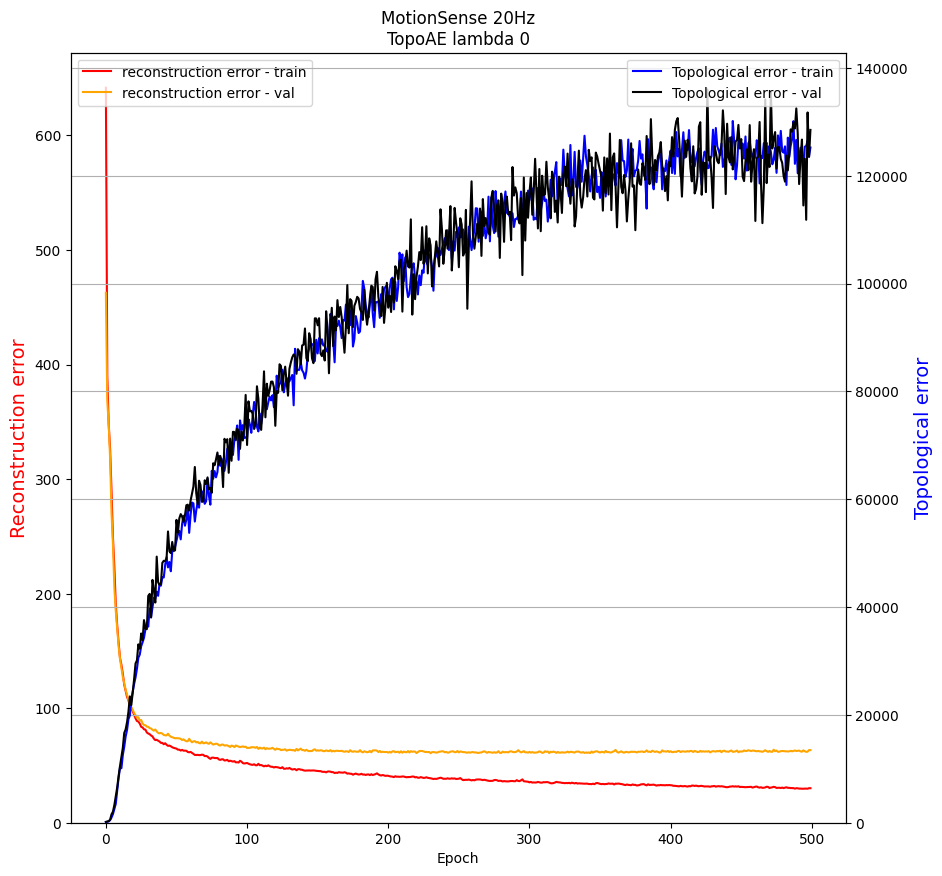

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:821.4991, Loss-ae:821.4947, Loss-topo:0.0440
Epoch:2, P:None, Loss:817.1706, Loss-ae:817.1701, Loss-topo:0.0050
Epoch:3, P:None, Loss:817.6828, Loss-ae:817.6825, Loss-topo:0.0021
Epoch:4, P:None, Loss:826.2789, Loss-ae:826.2788, Loss-topo:0.0008
Epoch:5, P:None, Loss:820.0283, Loss-ae:820.0282, Loss-topo:0.0011
Epoch:6, P:None, Loss:815.1698, Loss-ae:815.1698, Loss-topo:0.0008
Epoch:7, P:None, Loss:823.0805, Loss-ae:823.0805, Loss-topo:0.0006
Epoch:8, P:None, Loss:819.1667, Loss-ae:819.1666, Loss-topo:0.0008
Epoch:9, P:None, Loss:818.7704, Loss-ae:818.7703, Loss-topo:0.0007
Epoch:10, P:None, Loss:821.2545, Loss-ae:821.2544, Loss-topo:0.0006
Epoch:11, P:None, Loss:812.8646, Loss-ae:812.8646, Loss-topo:0.0007
Epoch:12, P:None, Loss:813.0315, Loss-ae:813.0314, Loss-topo:0.0008
Epoch:13, P:None, Loss:815.6463, Loss-ae:815.6462, Loss-topo:0.0009
Epoch:14, P:None, Loss:815.4610, Loss-ae:815.4609, Loss-topo:0.0007
Epoch:15, P:None, Loss:806.4412, Loss-ae:806.4411, Loss-t

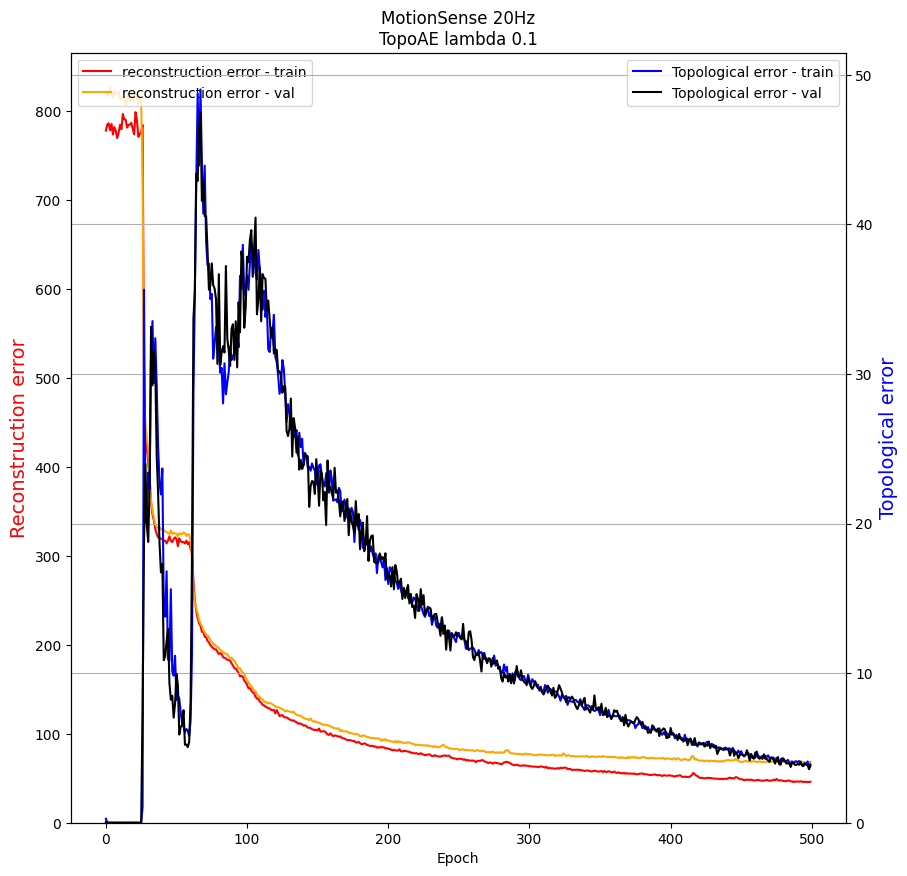

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:532.8531, Loss-ae:531.0581, Loss-topo:179.4946
Epoch:2, P:None, Loss:422.2637, Loss-ae:421.0669, Loss-topo:119.6789
Epoch:3, P:None, Loss:371.8818, Loss-ae:369.5837, Loss-topo:229.8066
Epoch:4, P:None, Loss:309.9928, Loss-ae:305.2710, Loss-topo:472.1820
Epoch:5, P:None, Loss:276.4167, Loss-ae:270.1661, Loss-topo:625.0582
Epoch:6, P:None, Loss:249.4497, Loss-ae:242.2841, Loss-topo:716.5548
Epoch:7, P:None, Loss:231.6051, Loss-ae:222.7593, Loss-topo:884.5791
Epoch:8, P:None, Loss:214.3483, Loss-ae:206.5250, Loss-topo:782.3318
Epoch:9, P:None, Loss:205.4928, Loss-ae:197.5832, Loss-topo:790.9558
Epoch:10, P:None, Loss:194.0304, Loss-ae:186.1692, Loss-topo:786.1193
Epoch:11, P:None, Loss:180.8706, Loss-ae:172.8569, Loss-topo:801.3681
Epoch:12, P:None, Loss:169.1391, Loss-ae:160.7859, Loss-topo:835.3196
Epoch:13, P:None, Loss:159.6838, Loss-ae:150.7878, Loss-topo:889.6012
Epoch:14, P:None, Loss:151.0225, Loss-ae:142.3296, Loss-topo:869.2850
Epoch:15, P:None, Loss:148.36

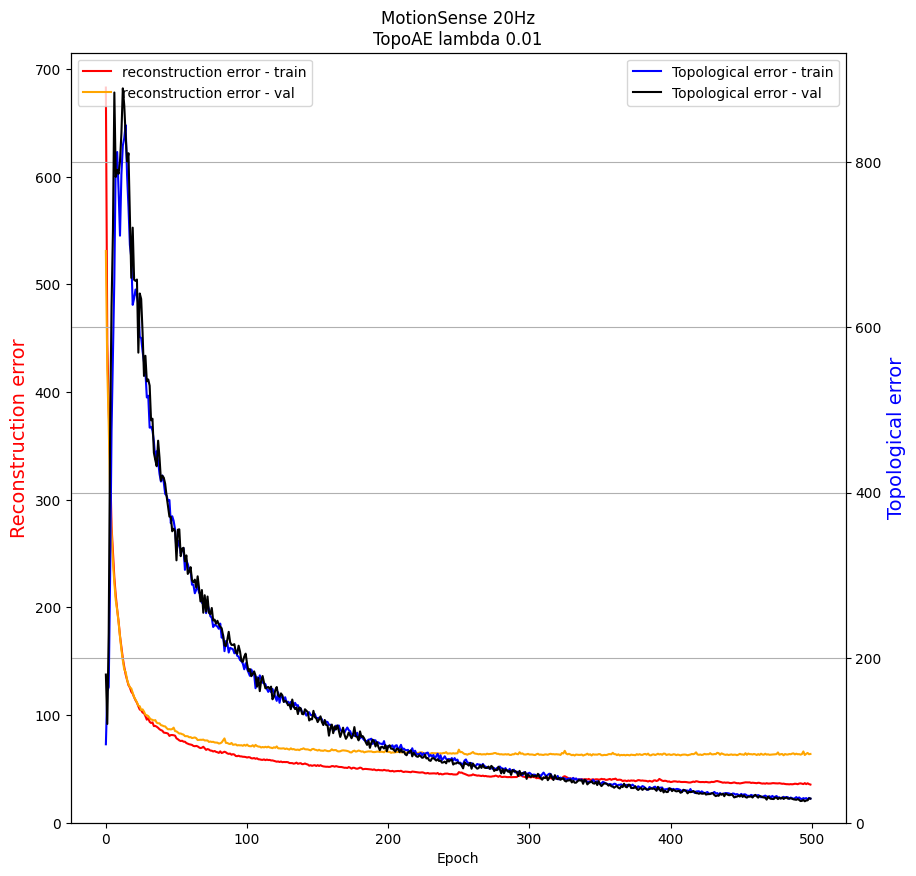

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:822.4614, Loss-ae:822.4419, Loss-topo:0.0195
Epoch:2, P:None, Loss:821.9016, Loss-ae:821.8977, Loss-topo:0.0039
Epoch:3, P:None, Loss:809.1966, Loss-ae:809.1958, Loss-topo:0.0008
Epoch:4, P:None, Loss:807.3071, Loss-ae:807.3066, Loss-topo:0.0005
Epoch:5, P:None, Loss:823.4667, Loss-ae:823.4657, Loss-topo:0.0009
Epoch:6, P:None, Loss:820.5713, Loss-ae:820.5707, Loss-topo:0.0006
Epoch:7, P:None, Loss:813.2069, Loss-ae:813.2062, Loss-topo:0.0007
Epoch:8, P:None, Loss:817.1736, Loss-ae:817.1729, Loss-topo:0.0007
Epoch:9, P:None, Loss:825.4433, Loss-ae:825.4424, Loss-topo:0.0009
Epoch:10, P:None, Loss:810.6281, Loss-ae:810.6276, Loss-topo:0.0005
Epoch:11, P:None, Loss:814.8405, Loss-ae:814.8401, Loss-topo:0.0005
Epoch:12, P:None, Loss:815.5683, Loss-ae:815.5677, Loss-topo:0.0006
Epoch:13, P:None, Loss:814.8620, Loss-ae:814.8612, Loss-topo:0.0008
Epoch:14, P:None, Loss:809.8158, Loss-ae:809.8147, Loss-topo:0.0011
Epoch:15, P:None, Loss:816.0349, Loss-ae:816.0345, Loss-t

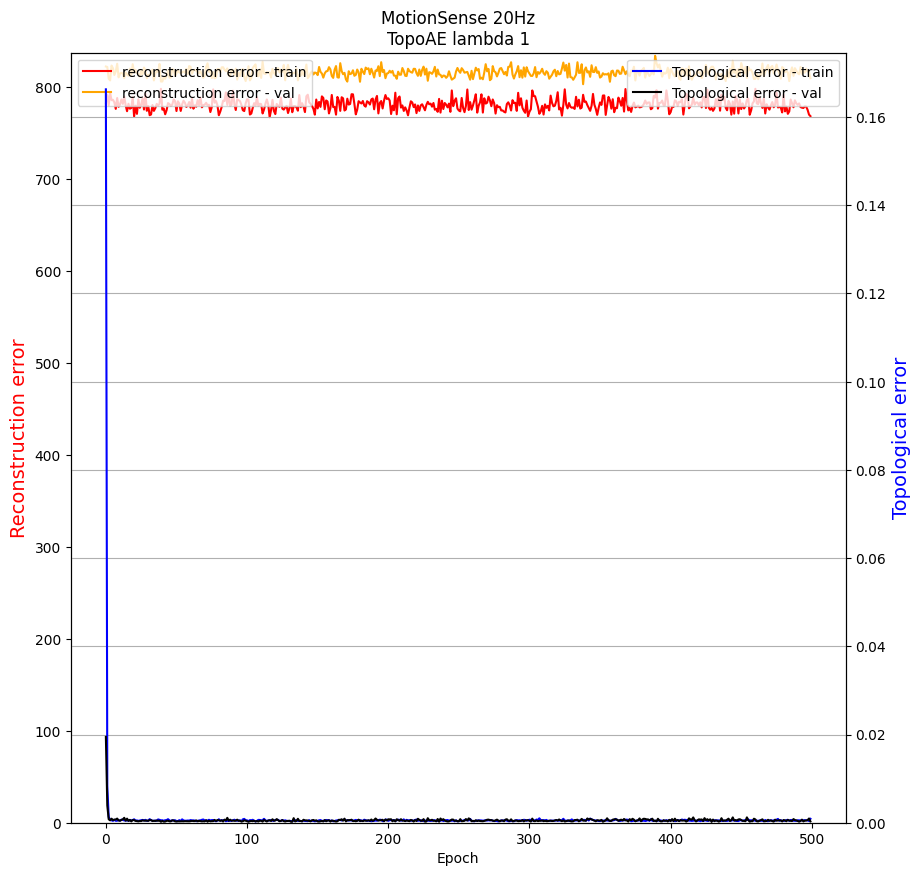

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:608.0733, Loss-ae:563.3612, Loss-topo:4.4712
Epoch:2, P:None, Loss:469.9046, Loss-ae:456.1073, Loss-topo:1.3797
Epoch:3, P:None, Loss:419.2913, Loss-ae:407.1701, Loss-topo:1.2121
Epoch:4, P:None, Loss:388.4460, Loss-ae:376.1559, Loss-topo:1.2290
Epoch:5, P:None, Loss:375.8051, Loss-ae:368.8721, Loss-topo:0.6933
Epoch:6, P:None, Loss:363.5792, Loss-ae:356.2517, Loss-topo:0.7328
Epoch:7, P:None, Loss:356.4881, Loss-ae:346.2124, Loss-topo:1.0276
Epoch:8, P:None, Loss:344.9379, Loss-ae:336.8780, Loss-topo:0.8060
Epoch:9, P:None, Loss:333.8381, Loss-ae:325.5300, Loss-topo:0.8308
Epoch:10, P:None, Loss:318.3832, Loss-ae:303.4146, Loss-topo:1.4969
Epoch:11, P:None, Loss:292.2522, Loss-ae:275.0746, Loss-topo:1.7178
Epoch:12, P:None, Loss:275.3301, Loss-ae:261.2703, Loss-topo:1.4060
Epoch:13, P:None, Loss:262.5970, Loss-ae:249.3471, Loss-topo:1.3250
Epoch:14, P:None, Loss:252.0879, Loss-ae:241.7606, Loss-topo:1.0327
Epoch:15, P:None, Loss:244.1993, Loss-ae:235.4035, Loss-t

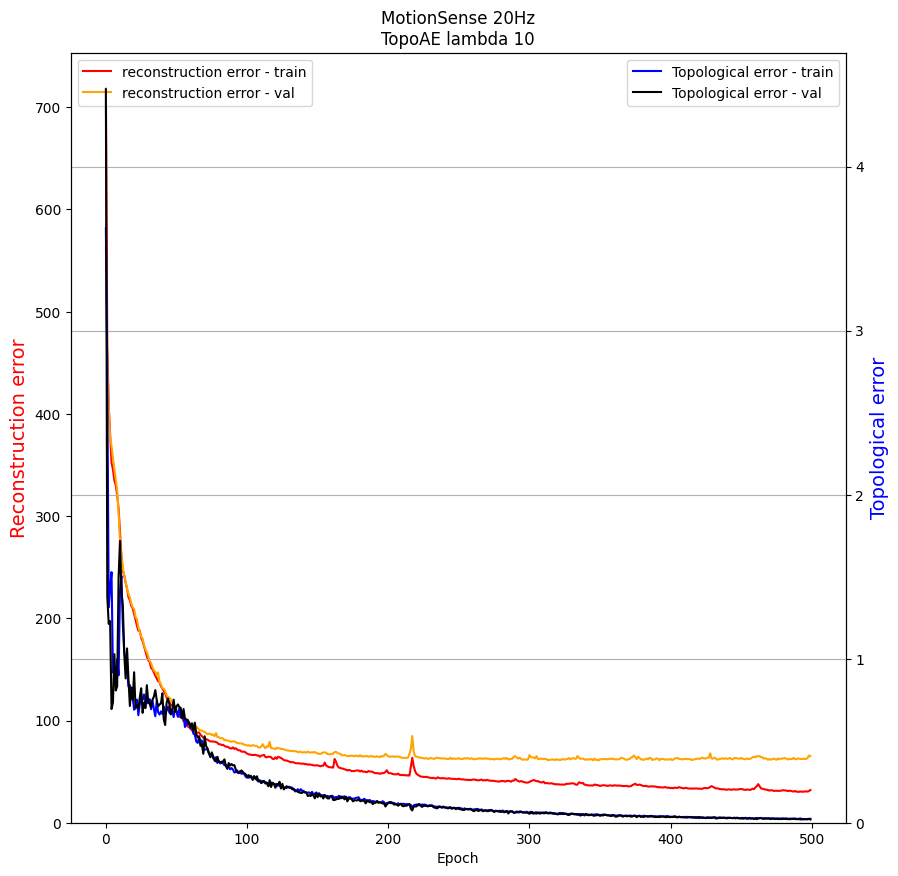

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:791.6214, Loss-ae:786.9745, Loss-topo:0.0465
Epoch:2, P:None, Loss:523.6175, Loss-ae:507.1147, Loss-topo:0.1650
Epoch:3, P:None, Loss:472.0211, Loss-ae:464.1093, Loss-topo:0.0791
Epoch:4, P:None, Loss:448.3943, Loss-ae:440.8820, Loss-topo:0.0751
Epoch:5, P:None, Loss:441.3936, Loss-ae:435.8153, Loss-topo:0.0558
Epoch:6, P:None, Loss:423.4087, Loss-ae:417.2105, Loss-topo:0.0620
Epoch:7, P:None, Loss:419.1144, Loss-ae:412.8590, Loss-topo:0.0626
Epoch:8, P:None, Loss:400.1707, Loss-ae:394.3331, Loss-topo:0.0584
Epoch:9, P:None, Loss:380.2671, Loss-ae:373.8775, Loss-topo:0.0639
Epoch:10, P:None, Loss:362.1732, Loss-ae:357.7650, Loss-topo:0.0441
Epoch:11, P:None, Loss:343.1908, Loss-ae:332.9138, Loss-topo:0.1028
Epoch:12, P:None, Loss:323.4363, Loss-ae:313.8435, Loss-topo:0.0959
Epoch:13, P:None, Loss:298.8948, Loss-ae:285.5582, Loss-topo:0.1334
Epoch:14, P:None, Loss:284.5716, Loss-ae:271.7403, Loss-topo:0.1283
Epoch:15, P:None, Loss:272.2654, Loss-ae:260.9432, Loss-t

KeyboardInterrupt: 

In [18]:
import pickle

# Variables to reuse
save_id = 4
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100, 1000]

for model_lam in model_lams:
    # Training model
    topo_reducer = CustomTopoDimRedTransform(
        model_name=model_name,
        model_lambda=model_lam,
        patience=None,
        num_epochs=model_epc,
        from_dim=180,
        to_dim=model_dim
    )

    title_plot = "MotionSense 20Hz\nTopoAE lambda {}".format(model_lam)
    topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

    # Variables to reuse
    filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)

    filehandler = open(filename, 'wb')
    pickle.dump(topo_reducer, filehandler)
    filehandler.close()